In [1]:
import matplotlib.pyplot as py
import seaborn as sb
import pandas as pd

In [2]:
df=sb.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 8.7 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
94,22.75,3.25,Female,No,Fri,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
108,18.24,3.76,Male,No,Sat,Dinner,2
39,31.27,5.00,Male,No,Sat,Dinner,3
216,28.15,3.00,Male,Yes,Sat,Dinner,5


In [8]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [9]:
df2=df.groupby('day').sum()# sum per day

In [10]:
df2

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [11]:
df2.drop('size',inplace=True,axis=1) # sum of size column is not relevant

In [12]:
df2

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


In [13]:
df2['percent']= (df2['tip']*100) / df2['total_bill'] #add percent

In [14]:
df2

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [15]:
df3=df.groupby('smoker').sum()

In [16]:
df3

,total_bill,tip,size
smoker,,,
Yes,1930.34,279.81,224
No,2897.43,451.77,403


In [17]:
df3['percent']= df3['tip'] / df3['total_bill'] *100

In [18]:
df3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


In [19]:
df4=df.groupby(['day','size']).sum()

In [20]:
df4

total_bill     tip
day  size                    
Thur 1          10.07    1.83
     2         727.53  117.24
     3          76.64   10.77
     4         149.75   21.09
     5          41.19    5.00
     6          91.15   15.90
Fri  1           8.58    1.92
     2         261.15   42.31
     3          15.98    3.00
     4          40.17    4.73
     5            NaN     NaN
     6            NaN     NaN
Sat  1          10.32    2.00
     2         892.37  133.43
     3         459.17   68.36
     4         388.39   53.61
     5          28.15    3.00
     6            NaN     NaN
Sun  1            NaN     NaN
     2         684.84  109.86
     3         332.76   46.81
     4         480.39   73.58
     5          81.00   12.14
     6          48.17    5.00

In [21]:
df4['percent']= df4['tip'] / df4['total_bill'] *100

In [22]:
df4.dropna()# drop null rows

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

# Visualization with Seaborn 

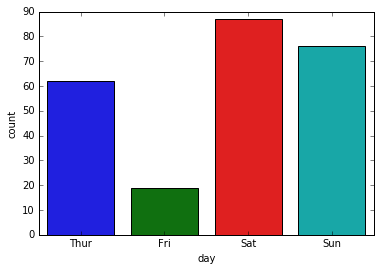

In [23]:
sb.countplot(x='day' ,data=df)

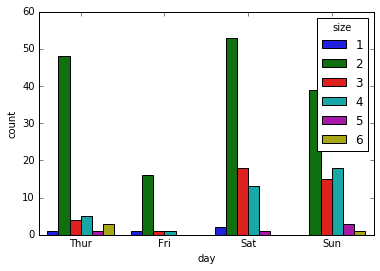

In [24]:
sb.countplot(x='day',hue='size' ,data=df)

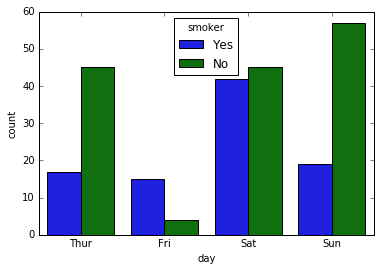

In [25]:
sb.countplot(x='day',hue='smoker' ,data=df)

# Transform and clean the data

### Using replace: 

In [26]:
#def sex(x):
#    if x=='Male':
#        return 0
#    else:
#        return 1
#df['sex']=df.sex.apply(sex)

df.replace({'sex':'Male'},0, inplace=True)
            


In [27]:
df.replace({'sex':'Female'},1, inplace=True)
df.replace({'smoker':'Yes'},1, inplace=True)
df.replace({'smoker':'No'},0, inplace=True)

df.sample(6)


,total_bill,tip,sex,smoker,day,time,size
206,26.59,3.41,0,1,Sat,Dinner,3
95,40.17,4.73,0,1,Fri,Dinner,4
85,34.83,5.17,1,0,Thur,Lunch,4
129,22.82,2.18,0,0,Thur,Lunch,3
216,28.15,3.00,0,1,Sat,Dinner,5
0,16.99,1.01,1,0,Sun,Dinner,2


### Using dummy variables:

In [28]:
days=pd.get_dummies(df['day'])

In [29]:
days.sample(5)

,Thur,Fri,Sat,Sun
54,0,0,0,1
26,0,0,1,0
7,0,0,0,1
34,0,0,1,0
84,1,0,0,0


In [30]:
days=pd.get_dummies(df['day'])

In [31]:
days.drop('Thur', inplace=True, axis=1)

In [32]:
days.sample(6)

,Fri,Sat,Sun
171,0,1,0
241,0,1,0
169,0,1,0
3,0,0,1
187,0,0,1
144,0,0,0


In [33]:
df = pd.concat([df,days],axis=1)
times=pd.get_dummies(df['time'])


In [34]:
times.sample(6)

,Lunch,Dinner
164,0,1
239,0,1
96,0,1
99,0,1
89,1,0
105,0,1


In [35]:
times.drop('Lunch', inplace=True, axis=1)
df = pd.concat([df,times],axis=1)
df.drop(['day','time'],inplace=True,axis=1)
df.head()

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Dinner
0,16.99,1.01,1,0,2,0,0,1,1
1,10.34,1.66,0,0,3,0,0,1,1
2,21.01,3.50,0,0,3,0,0,1,1
3,23.68,3.31,0,0,2,0,0,1,1
4,24.59,3.61,1,0,4,0,0,1,1


### Building our Machine Learning model

In [36]:
X = df[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y = df[['tip']]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
predictions=model.predict(X_test)

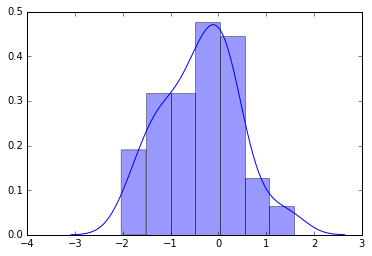

In [40]:
sb.distplot(y_test-predictions)

In [42]:
from sklearn import metrics

In [45]:
metrics.mean_squared_error(y_pred=predictions,y_true=y_test)

0.7790431554801629

In [46]:
metrics.explained_variance_score(y_pred=predictions,y_true=y_test)

0.46431395871712944